* interval -> ms

# Import Libraries

In [439]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

# POLO

### A

In [440]:
polo_a = pd.read_csv("./data/A/POLO_A_2025-01-31T17_59_47.140697Z-debug.csv")

polo_a.head(10)

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345800735,speed,0.0,335,1,1,0
1,1738345801078,rpm,983.0,140,2,2,0
2,1738345801218,engine_load,13.0,152,3,3,0
3,1738345801370,engine_oil_temperature,NO DATA\r>,116,4,4,1
4,1738345801486,coolant_temp,87.0,90,5,5,1
5,1738345801577,mass_air_flow,NO DATA\r>,153,6,6,2
6,1738345801730,throttle_position,16.0,156,7,7,2
7,1738345801887,voltage_control_module,13.65,151,8,8,2
8,1738345802038,fuel_level,71.37,144,9,9,2
9,1738345802182,fuel_pressure,NO DATA\r>,151,10,10,3


In [441]:
polo_a["Interval"].mean()

np.float64(143.7325925925926)

In [442]:
polo_a["Interval"].median()

np.float64(148.0)

In [443]:
polo_a.groupby("CommandSent")["Interval"].mean()

CommandSent
absolute_barometric_pressure        147.940000
absolute_load_value                 137.906667
absolute_throttle_pos_B             141.320000
accelerator_pedal_pos_D             145.606667
accelerator_pedal_pos_E             143.440000
air_fuel_ratio                      145.213333
catalyst_temp_bank1_sensor1         145.466667
coolant_temp                        140.933333
distance_traveled_with_MIL_on       144.653333
engine_fuel_rate                    137.060000
engine_load                         147.266667
engine_oil_temperature              141.953333
ethanol_percentage                  143.020000
fuel_level                          143.786667
fuel_pressure                       140.733333
fuel_rail_gauge_pressure            142.193333
fuel_rail_pressure                  139.126667
intake_air_temperature              143.340000
intake_manifold_absolut_pressure    147.833333
mass_air_flow                       146.320000
relative_throttle_pos               143.280000
r

In [444]:
polo_a.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        148.0
absolute_load_value                 148.0
absolute_throttle_pos_B             149.0
accelerator_pedal_pos_D             149.0
accelerator_pedal_pos_E             148.0
air_fuel_ratio                      149.0
catalyst_temp_bank1_sensor1         150.0
coolant_temp                        148.0
distance_traveled_with_MIL_on       149.0
engine_fuel_rate                    147.0
engine_load                         148.0
engine_oil_temperature              148.5
ethanol_percentage                  149.0
fuel_level                          148.0
fuel_pressure                       148.0
fuel_rail_gauge_pressure            148.0
fuel_rail_pressure                  149.0
intake_air_temperature              149.0
intake_manifold_absolut_pressure    149.0
mass_air_flow                       149.0
relative_throttle_pos               148.0
rpm                                 148.0
runtime_since_engine_start          148.0
speed                 

### B

In [445]:
polo_b = pd.read_csv("./data/B/POLO_B_2025-01-31T17_48_22.461519Z-debug.csv")

polo_b = polo_b.iloc[::2].reset_index(drop=True)

polo_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345088711,speed,0.0,309,1,1,0
1,1738345089034,rpm,981.0,162,2,4,0
2,1738345089240,engine_load,16.0,185,3,7,0
3,1738345089465,engine_oil_temperature,NO DATA,136,4,10,1
4,1738345089643,coolant_temp,71.0,186,5,13,1


In [446]:
polo_b["Interval"].mean()

np.float64(167.43897026187307)

In [447]:
polo_b["Interval"].median()

np.float64(177.0)

In [448]:
polo_b.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        177.0
absolute_load_value                 181.0
absolute_throttle_pos_B             177.0
accelerator_pedal_pos_D             180.0
accelerator_pedal_pos_E             175.5
air_fuel_ratio                      178.5
catalyst_temp_bank1_sensor1         177.0
coolant_temp                        180.0
distance_traveled_with_MIL_on       175.5
engine_fuel_rate                    133.0
engine_load                         177.0
engine_oil_temperature              131.0
ethanol_percentage                  175.0
fuel_level                          175.0
fuel_pressure                       133.0
fuel_rail_gauge_pressure            178.0
fuel_rail_pressure                  134.0
intake_air_temperature              178.0
intake_manifold_absolut_pressure    177.0
mass_air_flow                       134.0
relative_throttle_pos               176.0
rpm                                 179.0
runtime_since_engine_start          177.0
speed                 

### Plotting

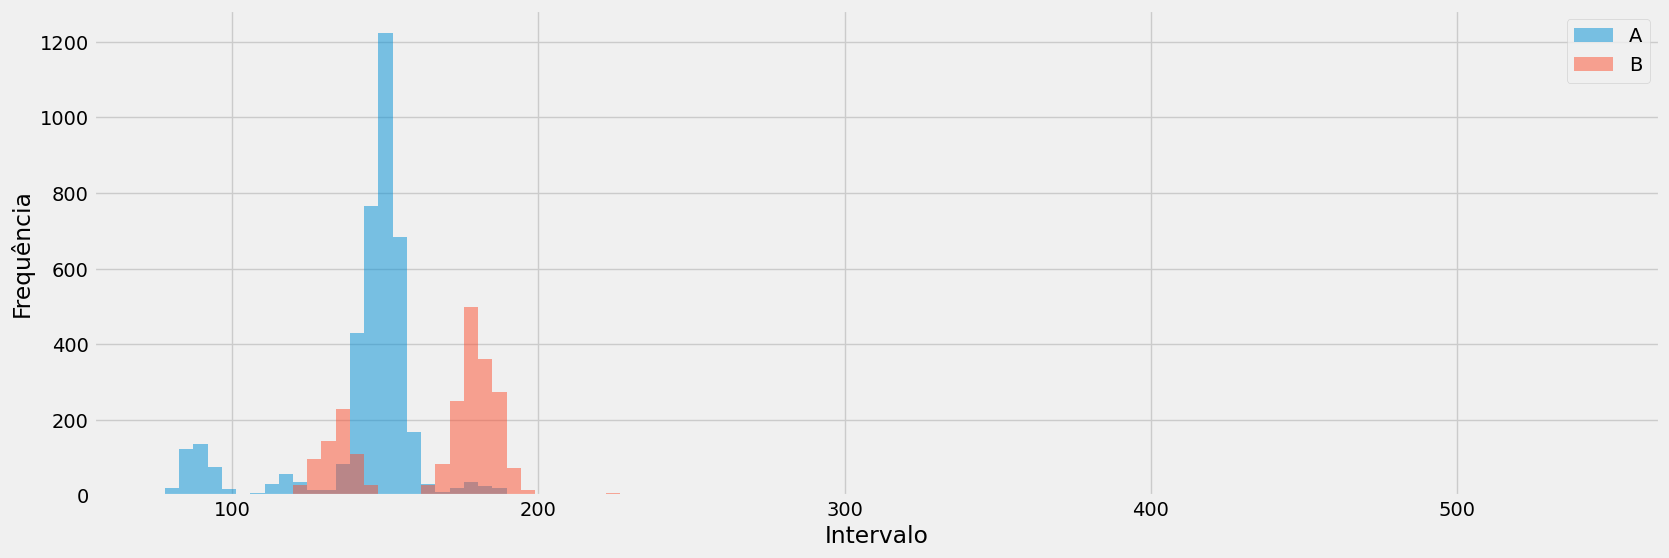

In [449]:
min_value = min(polo_a["Interval"].min(), polo_b["Interval"].min())
max_value = max(polo_a["Interval"].max(), polo_b["Interval"].max())

num_bins = 100
bins = np.linspace(min_value, max_value, num_bins + 1)

plt.figure(figsize=(18, 6))

plt.hist(polo_a["Interval"], bins=bins, alpha=0.5, label="A")
plt.hist(polo_b["Interval"], bins=bins, alpha=0.5, label="B")

plt.xlabel("Intervalo")
plt.ylabel("Frequência")

plt.legend(loc='upper right')

plt.show()


In [450]:
polo_a_intervals = polo_a["Interval"].dropna().values
polo_b_intervals = polo_b["Interval"].dropna().values

In [451]:
t_stat, t_p_value = stats.ttest_ind(polo_a_intervals, polo_b_intervals, equal_var=False)
print(f"T-test: Statistic = {t_stat}, p-value = {t_p_value:.4f}")

T-test: Statistic = -39.05653837479627, p-value = 0.0000


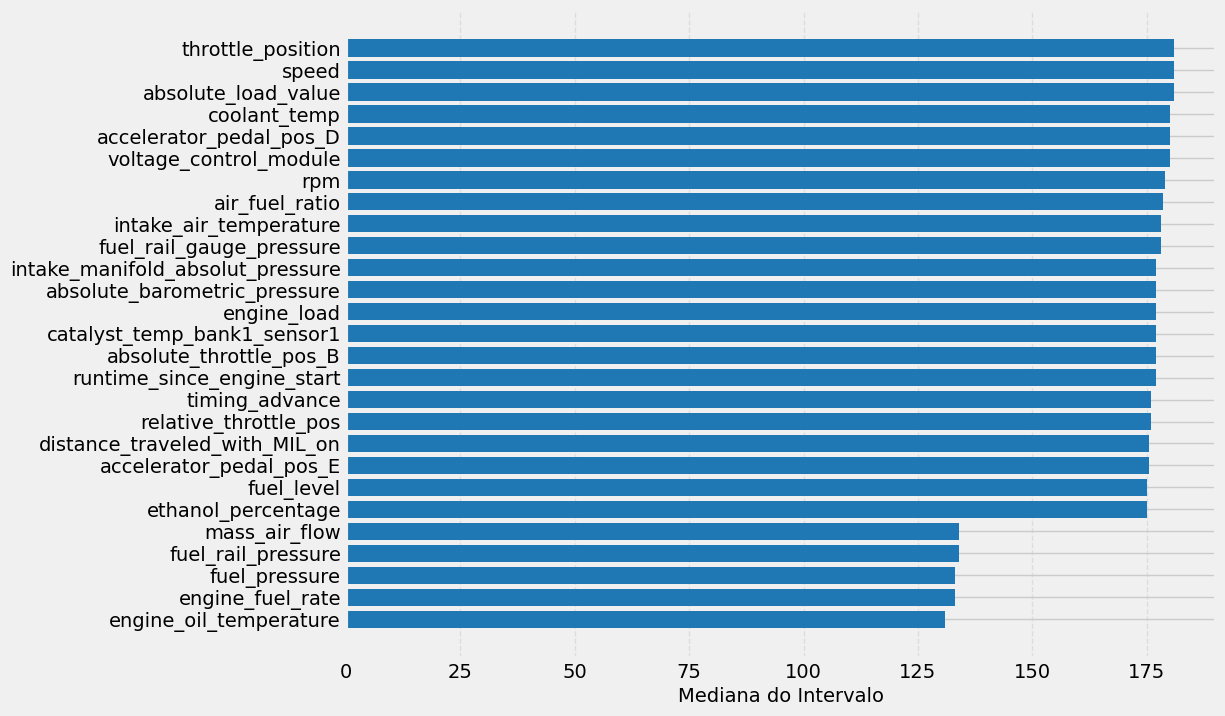

In [452]:
groupby_polo_a = polo_b.groupby("CommandSent")["Interval"].median().sort_values()

plt.figure(figsize=(10, 8))

plt.barh(groupby_polo_a.index, groupby_polo_a.values, color="#1f77b4")

plt.xlabel("Mediana do Intervalo", fontsize=14)

plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()

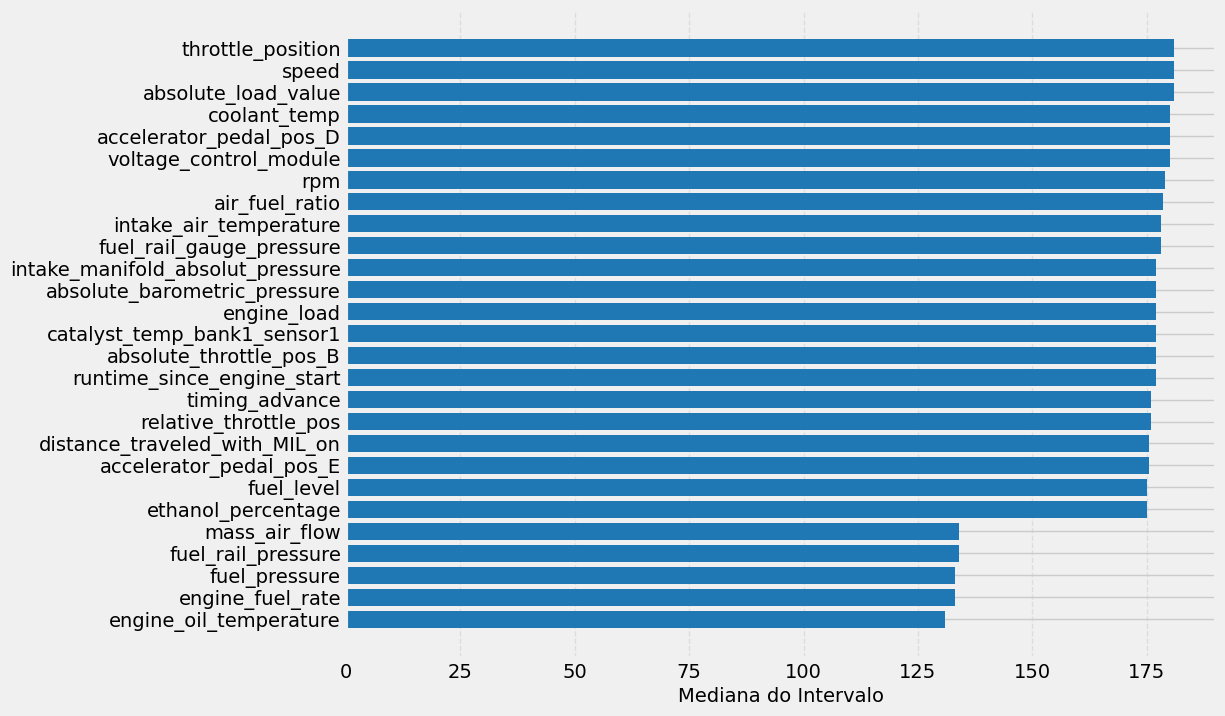

In [453]:
groupby_polo_b = polo_b.groupby("CommandSent")["Interval"].median().sort_values()

plt.figure(figsize=(10, 8))

plt.barh(groupby_polo_b.index, groupby_polo_b.values, color="#1f77b4")

plt.xlabel("Mediana do Intervalo", fontsize=14)

plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()

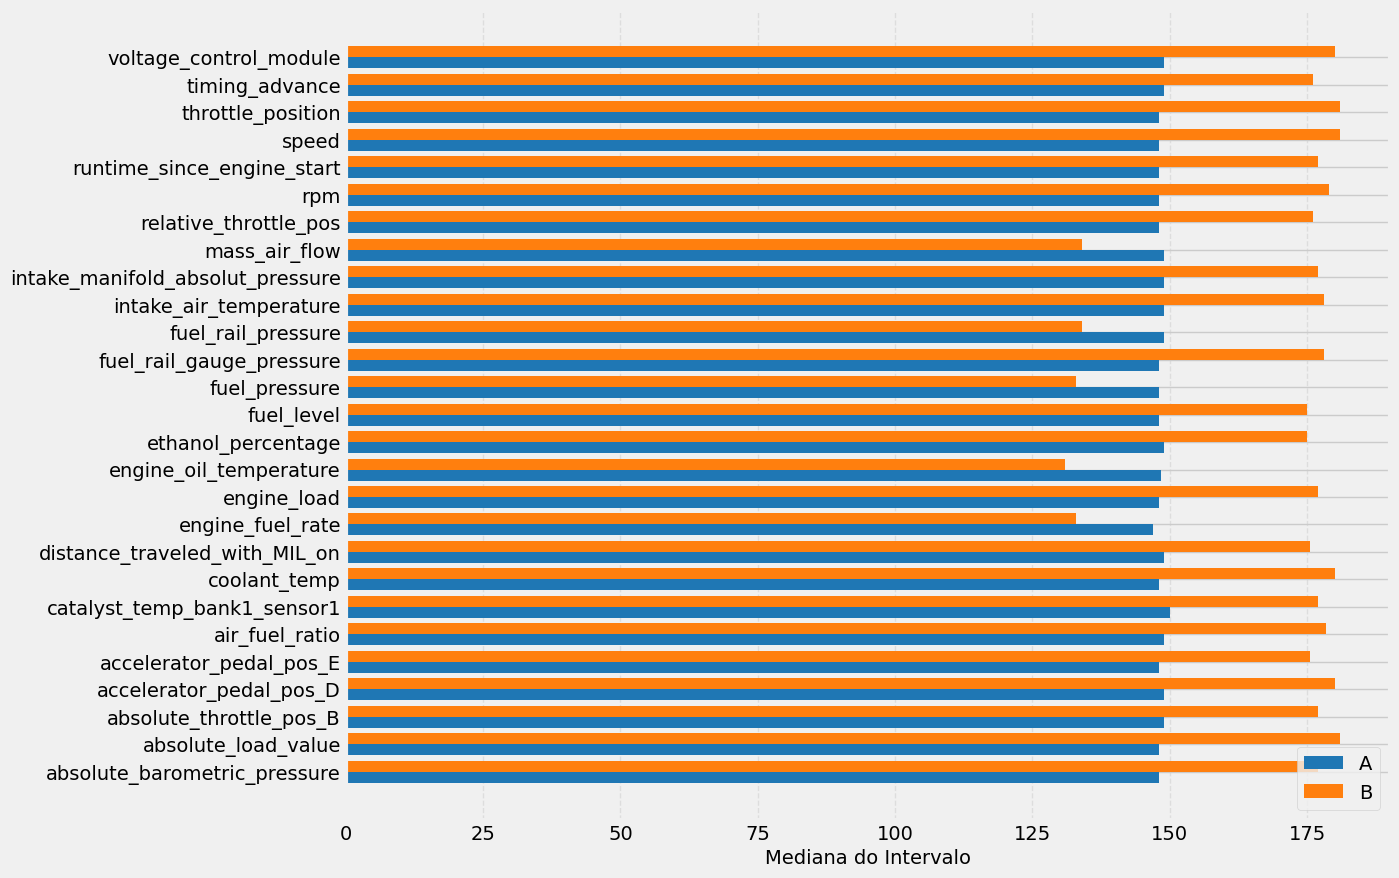

In [454]:
groupby_polo_a = polo_a.groupby("CommandSent")["Interval"].median().sort_index()
groupby_polo_b = polo_b.groupby("CommandSent")["Interval"].median().sort_index()

df_combined = pd.DataFrame({
    "Polo A": groupby_polo_a,
    "Polo B": groupby_polo_b
}).dropna()

x = np.arange(len(df_combined))
width = 0.4

plt.figure(figsize=(12, 10))

plt.barh(x - width/2, df_combined["Polo A"], width, label="A", color="#1f77b4")
plt.barh(x + width/2, df_combined["Polo B"], width, label="B", color="#ff7f0e")

plt.yticks(x, df_combined.index)
plt.xlabel("Mediana do Intervalo", fontsize=14)
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()


# FIT

### A

In [455]:
fit_a = pd.read_csv("./data/A/FIT_A_2025-01-31T17_48_23.509583Z-debug.csv")

fit_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345053621,speed,0.0,453,1,1,0
1,1738345054075,rpm,738.0,148,2,2,0
2,1738345054223,engine_load,22.0,151,3,3,0
3,1738345054375,engine_oil_temperature,NO DATA\r>,117,4,4,1
4,1738345054492,coolant_temp,81.0,90,5,5,1


In [456]:
fit_a["Interval"].mean()

np.float64(146.7248809253799)

In [457]:
fit_a["Interval"].median()

np.float64(149.0)

In [458]:
fit_a.groupby("CommandSent")["Interval"].mean()

CommandSent
absolute_barometric_pressure        151.000000
absolute_load_value                 134.907975
absolute_throttle_pos_B             150.926380
accelerator_pedal_pos_D             150.766871
accelerator_pedal_pos_E             151.460123
air_fuel_ratio                      151.165644
catalyst_temp_bank1_sensor1         151.128834
coolant_temp                        135.073171
distance_traveled_with_MIL_on       152.435583
engine_fuel_rate                    142.000000
engine_load                         150.146341
engine_oil_temperature              140.134146
ethanol_percentage                  142.098160
fuel_level                          151.355828
fuel_pressure                       141.184049
fuel_rail_gauge_pressure            144.907975
fuel_rail_pressure                  131.895706
intake_air_temperature              150.527607
intake_manifold_absolut_pressure    148.361963
mass_air_flow                       151.335366
relative_throttle_pos               135.374233
r

In [459]:
fit_a.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        150.0
absolute_load_value                 149.0
absolute_throttle_pos_B             150.0
accelerator_pedal_pos_D             150.0
accelerator_pedal_pos_E             149.0
air_fuel_ratio                      150.0
catalyst_temp_bank1_sensor1         150.0
coolant_temp                        149.0
distance_traveled_with_MIL_on       150.0
engine_fuel_rate                    149.0
engine_load                         149.0
engine_oil_temperature              147.0
ethanol_percentage                  149.0
fuel_level                          150.0
fuel_pressure                       148.0
fuel_rail_gauge_pressure            149.0
fuel_rail_pressure                  149.0
intake_air_temperature              149.0
intake_manifold_absolut_pressure    149.0
mass_air_flow                       150.0
relative_throttle_pos               148.0
rpm                                 148.0
runtime_since_engine_start          149.0
speed                 

### B

In [460]:
fit_b = pd.read_csv("./data/B/FIT_B_2025-01-31T18_00_37.690262Z-debug.csv")

fit_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345789191,speed,0.0,152,1,1,0
1,1738345789374,rpm,762.0,119,2,3,0
2,1738345789523,engine_load,20.0,121,3,5,0
3,1738345789674,engine_oil_temperature,NO DATA,123,4,7,1
4,1738345789800,coolant_temp,88.0,110,5,9,1


In [461]:
fit_b["Interval"].mean()

np.float64(122.95212407282536)

In [462]:
fit_b["Interval"].median()

np.float64(121.0)

In [463]:
fit_b.groupby("CommandSent")["Interval"].mean()

CommandSent
absolute_barometric_pressure        123.378049
absolute_load_value                 121.798780
absolute_throttle_pos_B             123.871951
accelerator_pedal_pos_D             123.660606
accelerator_pedal_pos_E             122.896970
air_fuel_ratio                      123.201220
catalyst_temp_bank1_sensor1         123.042683
coolant_temp                        122.151515
distance_traveled_with_MIL_on       123.345455
engine_fuel_rate                    123.097561
engine_load                         124.103030
engine_oil_temperature              123.866667
ethanol_percentage                  123.339394
fuel_level                          122.763636
fuel_pressure                       122.915152
fuel_rail_gauge_pressure            120.490909
fuel_rail_pressure                  120.763636
intake_air_temperature              123.818182
intake_manifold_absolut_pressure    120.812121
mass_air_flow                       123.854545
relative_throttle_pos               121.903030
r

In [464]:
fit_b.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        122.0
absolute_load_value                 119.0
absolute_throttle_pos_B             121.0
accelerator_pedal_pos_D             122.0
accelerator_pedal_pos_E             121.0
air_fuel_ratio                      121.0
catalyst_temp_bank1_sensor1         121.0
coolant_temp                        119.0
distance_traveled_with_MIL_on       121.0
engine_fuel_rate                    122.0
engine_load                         122.0
engine_oil_temperature              122.0
ethanol_percentage                  122.0
fuel_level                          121.0
fuel_pressure                       121.0
fuel_rail_gauge_pressure            119.0
fuel_rail_pressure                  119.0
intake_air_temperature              121.0
intake_manifold_absolut_pressure    119.0
mass_air_flow                       121.0
relative_throttle_pos               119.0
rpm                                 121.0
runtime_since_engine_start          121.0
speed                 

### Plotting

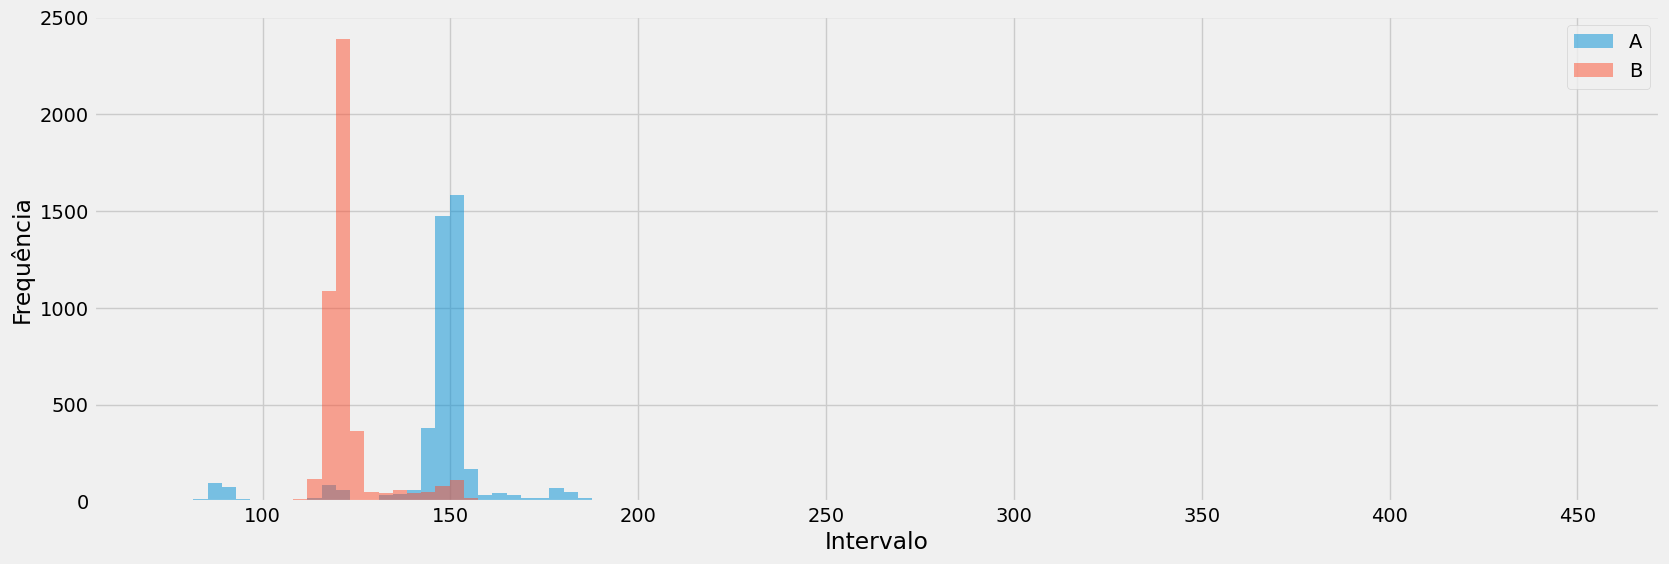

In [465]:
min_value = min(fit_a["Interval"].min(), fit_b["Interval"].min())
max_value = max(fit_a["Interval"].max(), fit_b["Interval"].max())

num_bins = 100
bins = np.linspace(min_value, max_value, num_bins + 1)

plt.figure(figsize=(18, 6))

plt.hist(fit_a["Interval"], bins=bins, alpha=0.5, label="A")
plt.hist(fit_b["Interval"], bins=bins, alpha=0.5, label="B")

plt.xlabel("Intervalo")
plt.ylabel("Frequência")

plt.legend(loc='upper right')

plt.show()

In [466]:
fit_a_intervals = fit_a["Interval"].dropna().values
fit_b_intervals = fit_b["Interval"].dropna().values

In [467]:
t_stat, t_p_value = stats.ttest_ind(fit_a_intervals, fit_b_intervals, equal_var=False)
print(f"T-test: Statistic = {t_stat}, p-value = {t_p_value:.4f}")

T-test: Statistic = 86.33193884672912, p-value = 0.0000


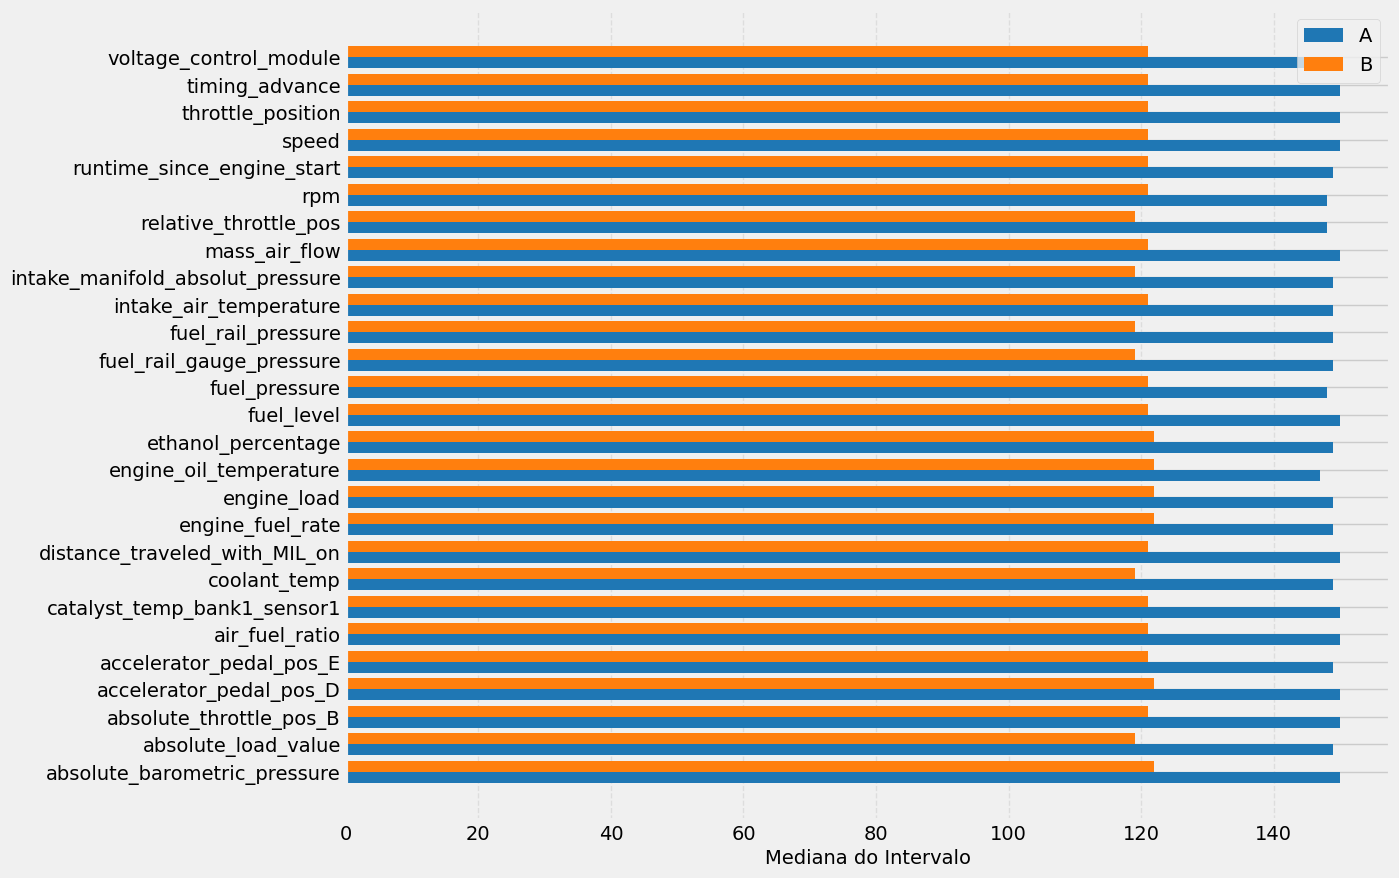

In [468]:
groupby_fit_a = fit_a.groupby("CommandSent")["Interval"].median().sort_index()
groupby_fit_b = fit_b.groupby("CommandSent")["Interval"].median().sort_index()

df_combined = pd.DataFrame({
    "Polo A": groupby_fit_a,
    "Polo B": groupby_fit_b
}).dropna()

x = np.arange(len(df_combined))
width = 0.4

plt.figure(figsize=(12, 10))

plt.barh(x - width/2, df_combined["Polo A"], width, label="A", color="#1f77b4")
plt.barh(x + width/2, df_combined["Polo B"], width, label="B", color="#ff7f0e")

plt.yticks(x, df_combined.index)
plt.xlabel("Mediana do Intervalo", fontsize=14)
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()


# FASTBACK

### A

In [469]:
fastback_a = pd.read_csv("./data/A/FASTBACK_A_2025-01-31T18_25_37.743808Z-debug.csv")

fastback_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738347324917,speed,0.0,280,1,1,0
1,1738347325197,rpm,941.0,156,2,2,0
2,1738347325353,engine_load,40.0,143,3,3,0
3,1738347325497,engine_oil_temperature,127.0,150,4,4,0
4,1738347325647,coolant_temp,82.0,151,5,5,0


In [470]:
fastback_a["Interval"].mean()

np.float64(143.68153918791313)

In [471]:
fastback_a["Interval"].median()

np.float64(149.0)

In [472]:
fastback_a.groupby("CommandSent")["Interval"].mean()

CommandSent
absolute_barometric_pressure        145.051282
absolute_load_value                 142.314103
absolute_throttle_pos_B             143.987261
accelerator_pedal_pos_D             143.866242
accelerator_pedal_pos_E             142.337580
air_fuel_ratio                      145.320513
catalyst_temp_bank1_sensor1         144.738854
coolant_temp                        142.681529
distance_traveled_with_MIL_on       144.509554
engine_fuel_rate                    141.579618
engine_load                         144.089172
engine_oil_temperature              142.917197
ethanol_percentage                  143.566879
fuel_level                          146.910828
fuel_pressure                       144.630573
fuel_rail_gauge_pressure            143.764331
fuel_rail_pressure                  142.031847
intake_air_temperature              143.726115
intake_manifold_absolut_pressure    141.146497
mass_air_flow                       143.509554
relative_throttle_pos               146.802548
r

In [473]:
fastback_a.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        149.0
absolute_load_value                 149.0
absolute_throttle_pos_B             149.0
accelerator_pedal_pos_D             149.0
accelerator_pedal_pos_E             149.0
air_fuel_ratio                      149.0
catalyst_temp_bank1_sensor1         149.0
coolant_temp                        149.0
distance_traveled_with_MIL_on       149.0
engine_fuel_rate                    148.0
engine_load                         149.0
engine_oil_temperature              149.0
ethanol_percentage                  149.0
fuel_level                          149.0
fuel_pressure                       149.0
fuel_rail_gauge_pressure            149.0
fuel_rail_pressure                  149.0
intake_air_temperature              149.0
intake_manifold_absolut_pressure    149.0
mass_air_flow                       148.0
relative_throttle_pos               149.0
rpm                                 148.0
runtime_since_engine_start          149.0
speed                 

### B

In [474]:
fastback_b = pd.read_csv("./data/B/FASTBACK_B_2025-01-31T18_13_34.480439Z-debug.csv")

fastback_b = fastback_b.iloc[::2].reset_index(drop=True)

fastback_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738346625814,speed,0.0,173,1,1,0
1,1738346626015,rpm,1008.0,153,2,4,0
2,1738346626195,engine_load,47.0,154,3,7,0
3,1738346626375,engine_oil_temperature,96.0,153,4,10,0
4,1738346626530,coolant_temp,53.0,148,5,13,0


In [475]:
fastback_b["Interval"].mean()

np.float64(140.16222030981066)

In [476]:
fastback_b["Interval"].median()

np.float64(148.0)

In [477]:
fastback_b.groupby("CommandSent")["Interval"].mean()

CommandSent
absolute_barometric_pressure        140.185714
absolute_load_value                 137.457143
absolute_throttle_pos_B             139.557143
accelerator_pedal_pos_D             136.057143
accelerator_pedal_pos_E             139.957746
air_fuel_ratio                      140.814286
catalyst_temp_bank1_sensor1         136.414286
coolant_temp                        148.482270
distance_traveled_with_MIL_on       149.567376
engine_fuel_rate                    138.100000
engine_load                         149.758865
engine_oil_temperature              138.521127
ethanol_percentage                  137.100000
fuel_level                          137.642857
fuel_pressure                       121.563380
fuel_rail_gauge_pressure            118.647887
fuel_rail_pressure                  120.271429
intake_air_temperature              138.774648
intake_manifold_absolut_pressure    137.971429
mass_air_flow                       121.414286
relative_throttle_pos               140.816901
r

In [478]:
fastback_b.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        146.0
absolute_load_value                 145.5
absolute_throttle_pos_B             147.0
accelerator_pedal_pos_D             142.0
accelerator_pedal_pos_E             147.0
air_fuel_ratio                      147.0
catalyst_temp_bank1_sensor1         145.0
coolant_temp                        150.0
distance_traveled_with_MIL_on       150.0
engine_fuel_rate                    146.0
engine_load                         153.0
engine_oil_temperature              148.0
ethanol_percentage                  146.0
fuel_level                          149.0
fuel_pressure                       119.0
fuel_rail_gauge_pressure            118.0
fuel_rail_pressure                  119.0
intake_air_temperature              148.0
intake_manifold_absolut_pressure    147.0
mass_air_flow                       121.0
relative_throttle_pos               146.0
rpm                                 152.0
runtime_since_engine_start          146.0
speed                 

### Plotting

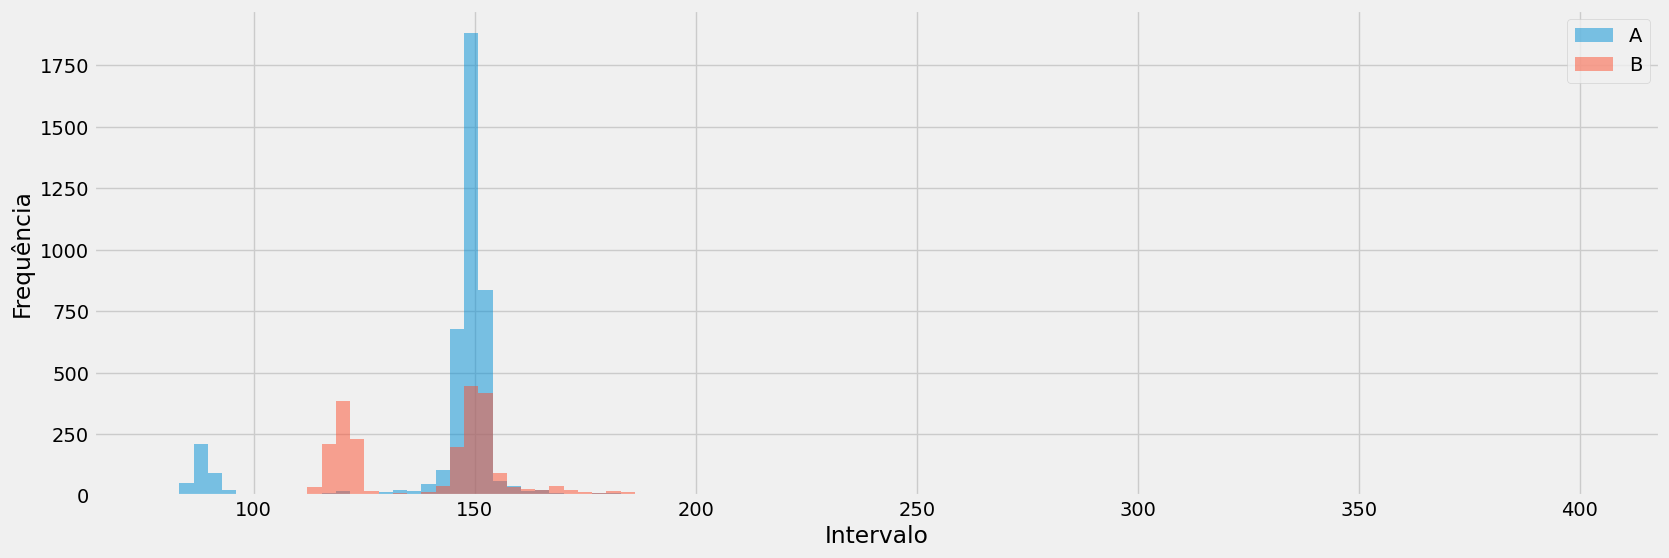

In [479]:
min_value = min(fastback_a["Interval"].min(), fastback_b["Interval"].min())
max_value = max(fastback_a["Interval"].max(), fastback_b["Interval"].max())

num_bins = 100
bins = np.linspace(min_value, max_value, num_bins + 1)

plt.figure(figsize=(18, 6))

plt.hist(fastback_a["Interval"], bins=bins, alpha=0.5, label="A")
plt.hist(fastback_b["Interval"], bins=bins, alpha=0.5, label="B")

plt.xlabel("Intervalo")
plt.ylabel("Frequência")

plt.legend(loc='upper right')

plt.show()

In [480]:
fastback_a_intervals = fastback_a["Interval"].dropna().values
fastback_b_intervals = fastback_b["Interval"].dropna().values

In [481]:
t_stat, t_p_value = stats.ttest_ind(fastback_a_intervals, fastback_b_intervals, equal_var=False)
print(f"T-test: Statistic = {t_stat}, p-value = {t_p_value:.4f}")

T-test: Statistic = 7.407115831617308, p-value = 0.0000


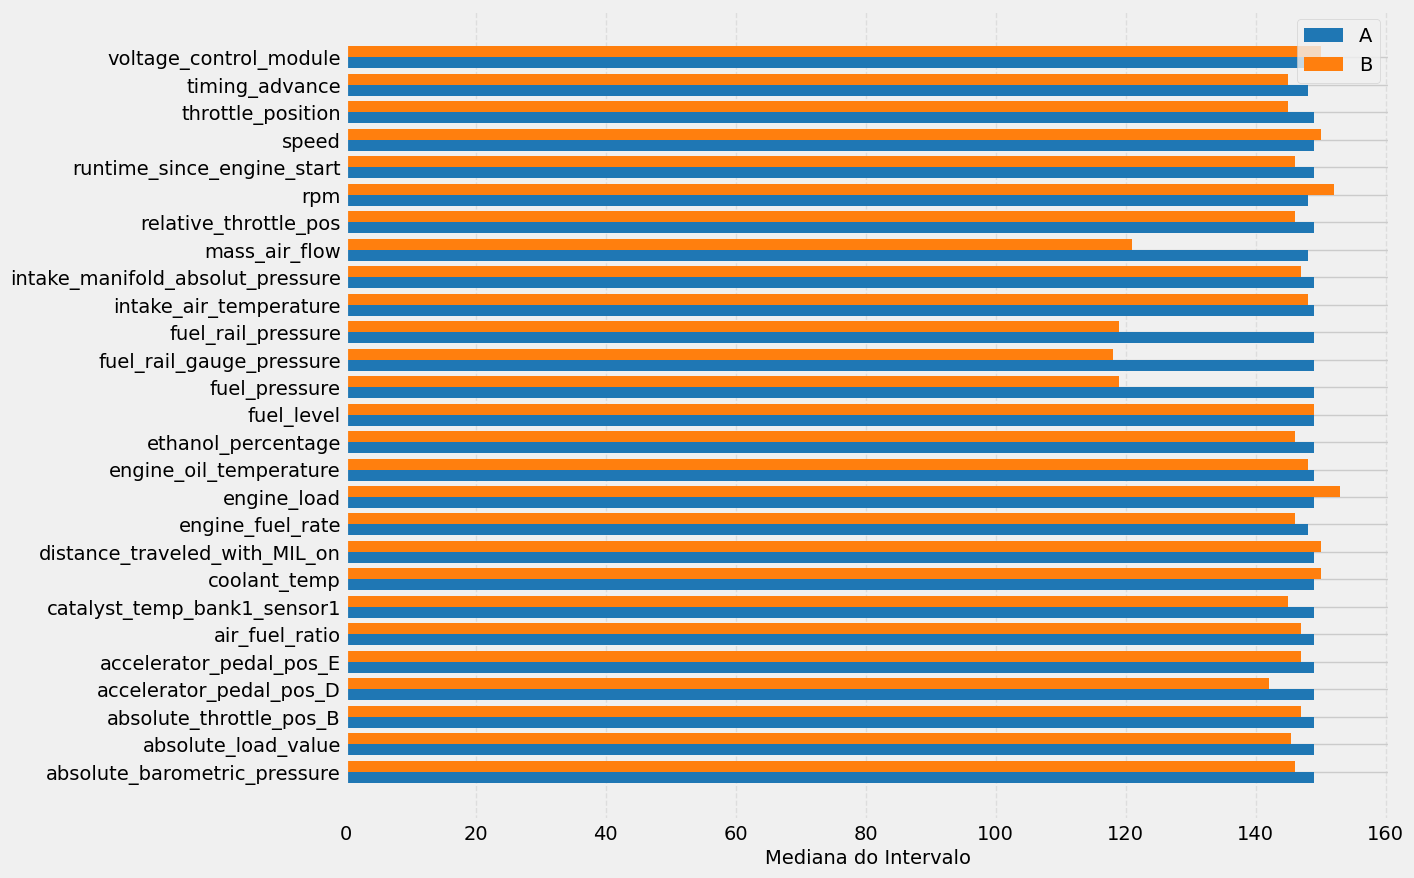

In [482]:
groupby_fastback_a = fastback_a.groupby("CommandSent")["Interval"].median().sort_index()
groupby_fastback_b = fastback_b.groupby("CommandSent")["Interval"].median().sort_index()

df_combined = pd.DataFrame({
    "Polo A": groupby_fastback_a,
    "Polo B": groupby_fastback_b
}).dropna()

x = np.arange(len(df_combined))
width = 0.4

plt.figure(figsize=(12, 10))

plt.barh(x - width/2, df_combined["Polo A"], width, label="A", color="#1f77b4")
plt.barh(x + width/2, df_combined["Polo B"], width, label="B", color="#ff7f0e")

plt.yticks(x, df_combined.index)
plt.xlabel("Mediana do Intervalo", fontsize=14)
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()


# TCROSS

### A

In [483]:
tcross_a = pd.read_csv("./data/A/TCROSS_A_2025-01-31T18_13_48.052103Z-debug.csv")

tcross_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738346588337,fuel_pressure,NO DATA\r>,492,200,199,45
1,1738346588829,fuel_rail_pressure,NO DATA\r>,151,201,200,46
2,1738346588980,fuel_rail_gauge_pressure,NO DATA\r>,150,202,201,47
3,1738346589130,intake_manifold_absolut_pressure,65.0,149,203,202,47
4,1738346589279,timing_advance,-9.0,151,204,203,47


In [484]:
tcross_a["Interval"].mean()

np.float64(147.23370319001387)

In [485]:
tcross_a["Interval"].median()

np.float64(149.0)

In [486]:
tcross_a.groupby("CommandSent")["Interval"].mean()

CommandSent
absolute_barometric_pressure        146.500000
absolute_load_value                 146.956250
absolute_throttle_pos_B             145.856250
accelerator_pedal_pos_D             146.093750
accelerator_pedal_pos_E             146.212500
air_fuel_ratio                      145.456250
catalyst_temp_bank1_sensor1         146.181250
coolant_temp                        149.431250
distance_traveled_with_MIL_on       148.968750
engine_fuel_rate                    142.975000
engine_load                         149.012500
engine_oil_temperature              142.350000
ethanol_percentage                  148.456250
fuel_level                          147.450000
fuel_pressure                       149.888199
fuel_rail_gauge_pressure            144.118012
fuel_rail_pressure                  146.826087
intake_air_temperature              150.812500
intake_manifold_absolut_pressure    149.111801
mass_air_flow                       148.231250
relative_throttle_pos               145.575000
r

In [487]:
tcross_a.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        150.0
absolute_load_value                 149.5
absolute_throttle_pos_B             150.0
accelerator_pedal_pos_D             150.0
accelerator_pedal_pos_E             149.0
air_fuel_ratio                      149.0
catalyst_temp_bank1_sensor1         149.0
coolant_temp                        150.0
distance_traveled_with_MIL_on       149.0
engine_fuel_rate                    149.0
engine_load                         149.0
engine_oil_temperature              148.0
ethanol_percentage                  149.0
fuel_level                          149.0
fuel_pressure                       149.0
fuel_rail_gauge_pressure            149.0
fuel_rail_pressure                  150.0
intake_air_temperature              149.0
intake_manifold_absolut_pressure    150.0
mass_air_flow                       150.0
relative_throttle_pos               149.0
rpm                                 148.0
runtime_since_engine_start          149.0
speed                 

### B

In [488]:
tcross_b = pd.read_csv("./data/B/TCROSS_B_2025-01-31T18_25_15.916263Z-debug.csv")

tcross_b = tcross_b.iloc[::2].reset_index(drop=True)

tcross_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738347287369,speed,0.0,206,1,1,0
1,1738347287620,rpm,982.0,180,2,4,0
2,1738347287801,engine_load,15.0,180,3,7,0
3,1738347288025,engine_oil_temperature,NO DATA,134,4,10,1
4,1738347288160,coolant_temp,85.0,184,5,13,1


In [489]:
tcross_b["Interval"].mean()

np.float64(173.64211005002275)

In [490]:
tcross_b["Interval"].median()

np.float64(178.0)

In [491]:
tcross_b.groupby("CommandSent")["Interval"].mean()

CommandSent
absolute_barometric_pressure        176.500000
absolute_load_value                 181.784000
absolute_throttle_pos_B             172.532258
accelerator_pedal_pos_D             180.800000
accelerator_pedal_pos_E             176.158730
air_fuel_ratio                      174.793651
catalyst_temp_bank1_sensor1         188.206349
coolant_temp                        181.190476
distance_traveled_with_MIL_on       181.682540
engine_fuel_rate                    139.177419
engine_load                         186.571429
engine_oil_temperature              138.718750
ethanol_percentage                  176.031746
fuel_level                          173.079365
fuel_pressure                       140.619048
fuel_rail_gauge_pressure            145.698413
fuel_rail_pressure                  139.269841
intake_air_temperature              176.841270
intake_manifold_absolut_pressure    177.047619
mass_air_flow                       143.822581
relative_throttle_pos               171.952381
r

In [492]:
tcross_b.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        178.5
absolute_load_value                 180.0
absolute_throttle_pos_B             178.0
accelerator_pedal_pos_D             180.0
accelerator_pedal_pos_E             179.0
air_fuel_ratio                      179.0
catalyst_temp_bank1_sensor1         178.0
coolant_temp                        180.0
distance_traveled_with_MIL_on       178.0
engine_fuel_rate                    134.0
engine_load                         179.0
engine_oil_temperature              133.5
ethanol_percentage                  178.0
fuel_level                          178.0
fuel_pressure                       135.0
fuel_rail_gauge_pressure            135.0
fuel_rail_pressure                  134.0
intake_air_temperature              178.0
intake_manifold_absolut_pressure    179.0
mass_air_flow                       135.0
relative_throttle_pos               178.0
rpm                                 180.0
runtime_since_engine_start          177.0
speed                 

### Plotting

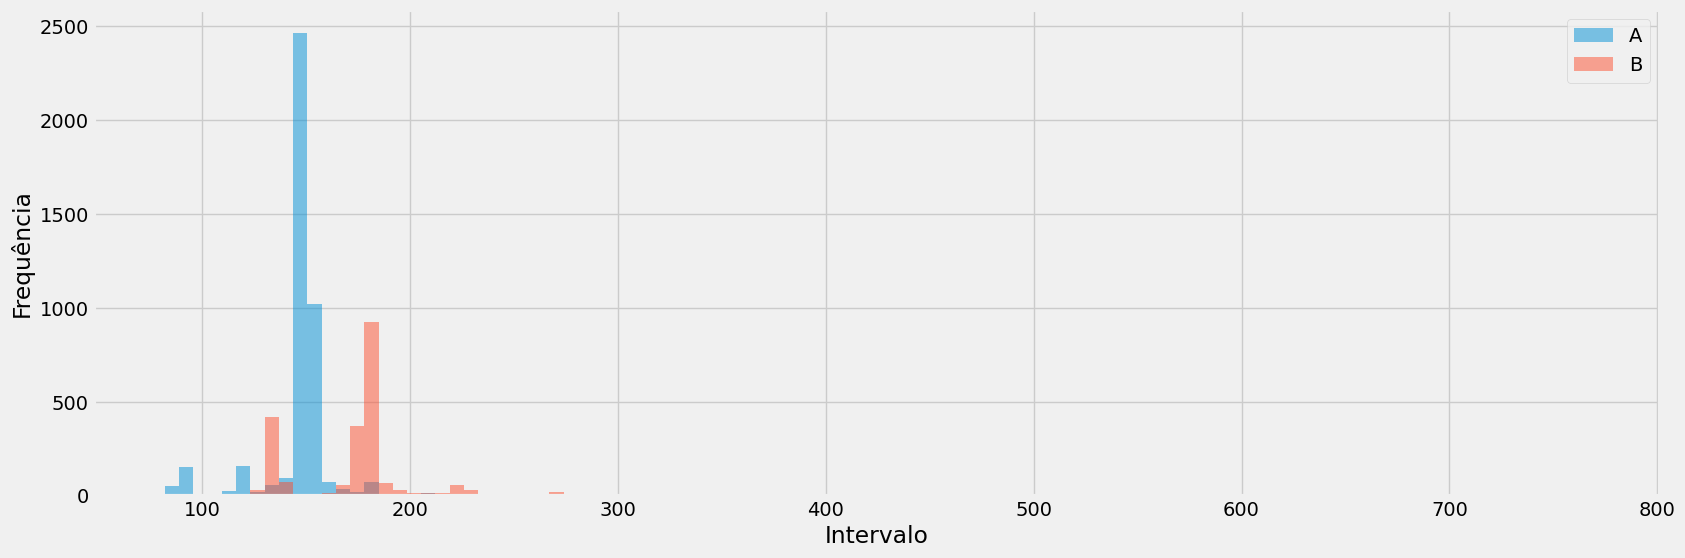

In [493]:
min_value = min(tcross_a["Interval"].min(), tcross_b["Interval"].min())
max_value = max(tcross_a["Interval"].max(), tcross_b["Interval"].max())

num_bins = 100
bins = np.linspace(min_value, max_value, num_bins + 1)

plt.figure(figsize=(18, 6))

plt.hist(tcross_a["Interval"], bins=bins, alpha=0.5, label="A")
plt.hist(tcross_b["Interval"], bins=bins, alpha=0.5, label="B")

plt.xlabel("Intervalo")
plt.ylabel("Frequência")

plt.legend(loc='upper right')

plt.show()

In [494]:
tcross_a_intervals = tcross_a["Interval"].dropna().values
tcross_b_intervals = tcross_b["Interval"].dropna().values

In [495]:
t_stat, t_p_value = stats.ttest_ind(tcross_a_intervals, tcross_b_intervals, equal_var=False)
print(f"T-test: Statistic = {t_stat}, p-value = {t_p_value:.4f}")

T-test: Statistic = -32.22883307550099, p-value = 0.0000


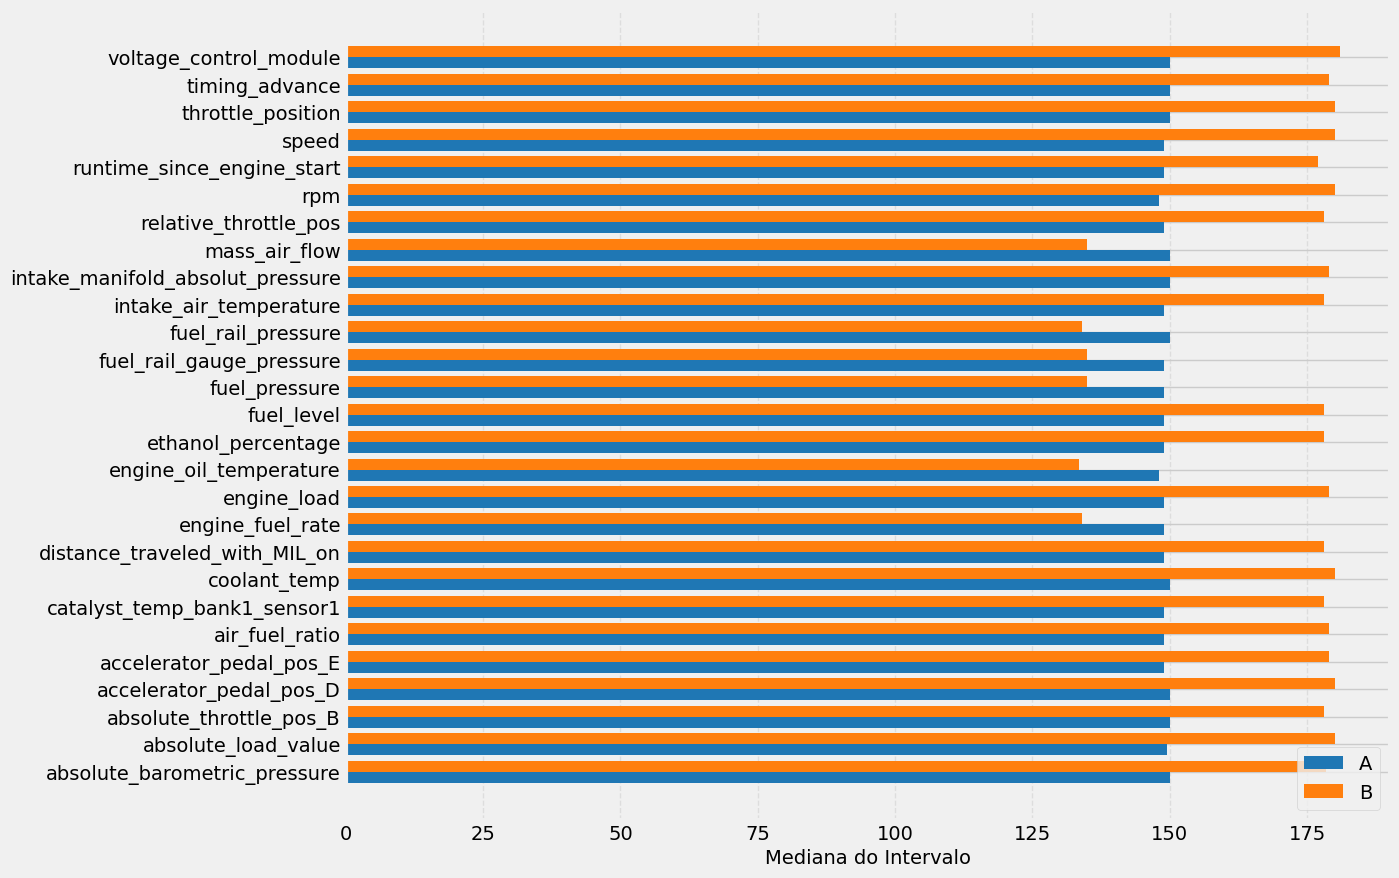

In [496]:
groupby_tcross_a = tcross_a.groupby("CommandSent")["Interval"].median().sort_index()
groupby_tcross_b = tcross_b.groupby("CommandSent")["Interval"].median().sort_index()

df_combined = pd.DataFrame({
    "Polo A": groupby_tcross_a,
    "Polo B": groupby_tcross_b
}).dropna()

x = np.arange(len(df_combined))
width = 0.4

plt.figure(figsize=(12, 10))

plt.barh(x - width/2, df_combined["Polo A"], width, label="A", color="#1f77b4")
plt.barh(x + width/2, df_combined["Polo B"], width, label="B", color="#ff7f0e")

plt.yticks(x, df_combined.index)
plt.xlabel("Mediana do Intervalo", fontsize=14)
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()


# General Plotting

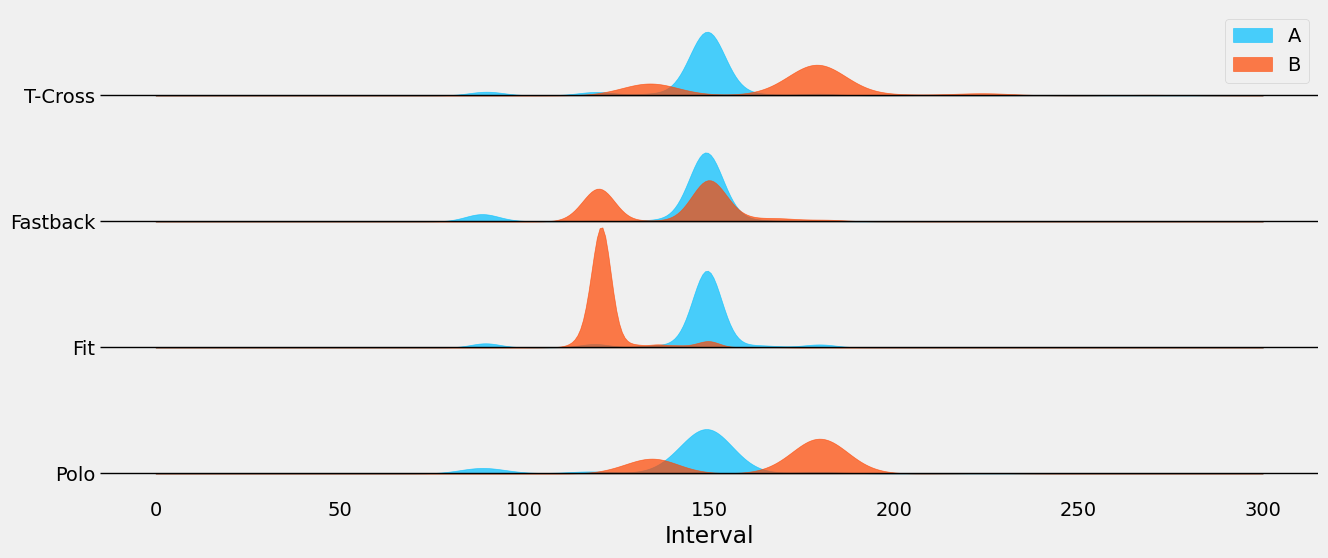

In [128]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Dummy data for demonstration
np.random.seed(42)
polo_a = {"Interval": polo_a["Interval"]}
polo_b = {"Interval": polo_b["Interval"]}
fit_a = {"Interval": fit_a["Interval"]}
fit_b = {"Interval": fit_b["Interval"]}
fastback_a = {"Interval": fastback_a["Interval"]}
fastback_b = {"Interval": fastback_b["Interval"]}
tcross_a = {"Interval": tcross_a["Interval"]}
tcross_b = {"Interval": tcross_b["Interval"]}

cars = ["Polo", "Fit", "Fastback", "T-Cross"]
samples = [
    [polo_a["Interval"], polo_b["Interval"]],
    [fit_a["Interval"], fit_b["Interval"]],
    [fastback_a["Interval"], fastback_b["Interval"]],
    [tcross_a["Interval"], tcross_b["Interval"]],
]

# Colors
colors = ['deepskyblue', 'orangered']

# Ridge plot
plt.figure(figsize=(14, 6))

# KDE points
x_vals = np.linspace(0, 300, 400)

# Plotting
for i, car_samples in enumerate(samples):
    offset = i * 2  # Vertical offset
    
    for j, sample in enumerate(car_samples):
        kde = gaussian_kde(sample, bw_method=0.2)
        density = kde(x_vals) * 15
        
        plt.fill_between(x_vals, density + offset, offset, color=colors[j % 2], alpha=0.7)
    
    # Horizontal separator line
    plt.axhline(y=offset, color='black', linewidth=1)

# Formatting
plt.yticks([i * 2 for i in range(len(cars))], cars)
# plt.xticks([])
plt.grid(False)
plt.box(False)

plt.xlabel("Interval")
plt.legend(["A", "B"], loc="upper right")

plt.show()


In [141]:
import folium

df = pd.read_csv("./data/miguel.csv")[["Latitude", "Longitude"]].iloc[3:]

latitude_centro = df["Latitude"].mean()
longitude_centro = df["Longitude"].mean()

mapa = folium.Map(location=[latitude_centro, longitude_centro], zoom_start=10, tiles="CartoDB dark_matter")

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=3,  # Tamanho do ponto
        color="#3452eb",  # Cor da borda
        fill=True,
        fill_color="#3452eb",  # Cor do preenchimento
        fill_opacity=0.7,  # Transparência do ponto
    ).add_to(mapa)

# 4. Salvar o mapa
mapa.save("mapa.html")